In [192]:
import pandas_datareader as pdf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import seaborn as sns
from scipy import stats
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [193]:
fed_data1 = pdf.get_data_fred(['FEDFUNDS','UNRATE', 'INDPRO', 'W823RC1', 'CPILFESL', 'FRGSHPUSM649NCIS'])
fed_data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-05-01 to 2022-03-01
Freq: MS
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FEDFUNDS          59 non-null     float64
 1   UNRATE            59 non-null     float64
 2   INDPRO            59 non-null     float64
 3   W823RC1           58 non-null     float64
 4   CPILFESL          59 non-null     float64
 5   FRGSHPUSM649NCIS  59 non-null     float64
dtypes: float64(6)
memory usage: 3.2 KB


In [194]:
fed_data2 = pdf.get_data_fred(['DCOILBRENTEU', 'WM2NS', 'FRGSHPUSM649NCIS'])
fed_data2 = fed_data2.resample('D').asfreq().fillna(method='ffill').reset_index()
fed_data2.describe()

,DCOILBRENTEU,WM2NS,FRGSHPUSM649NCIS
count,1817.000000,1814.000000,1814.000000
mean,63.288855,16630.665050,1.158337
std,16.887921,2894.305166,0.074395
min,9.120000,13449.400000,0.923000
25%,53.190000,14148.500000,1.128000
50%,64.290000,15116.700000,1.171000
75%,72.360000,19389.200000,1.203000
max,133.180000,22072.100000,1.307000


In [195]:
fed_data2.dropna().tail()

,DATE,DCOILBRENTEU,WM2NS,FRGSHPUSM649NCIS
1812,2022-04-14,110.83,22072.1,1.203
1813,2022-04-15,110.83,22072.1,1.203
1814,2022-04-16,110.83,22072.1,1.203
1815,2022-04-17,110.83,22072.1,1.203
1816,2022-04-18,110.83,22072.1,1.203


In [196]:
covid_data = pd.read_csv('covid.csv', sep = ',')
covid_df = pd.DataFrame(covid_data).set_index('DATE')
covid_df.index = pd.to_datetime(covid_df.index)
covid_df.index.name = 'DATE'

In [197]:
merge_df = [fed_data1, fed_data2, covid_df]
new_df = covid_df.merge(fed_data1, on='DATE').dropna().merge(fed_data2, on='DATE')
new_df.info()
new_df.set_index('DATE', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                25 non-null     datetime64[ns]
 1   Confirmed           25 non-null     int64         
 2   FEDFUNDS            25 non-null     float64       
 3   UNRATE              25 non-null     float64       
 4   INDPRO              25 non-null     float64       
 5   W823RC1             25 non-null     float64       
 6   CPILFESL            25 non-null     float64       
 7   FRGSHPUSM649NCIS_x  25 non-null     float64       
 8   DCOILBRENTEU        25 non-null     float64       
 9   WM2NS               25 non-null     float64       
 10  FRGSHPUSM649NCIS_y  25 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 2.3 KB


In [198]:
new_df

,Confirmed,FEDFUNDS,UNRATE,INDPRO,W823RC1,CPILFESL,FRGSHPUSM649NCIS_x,DCOILBRENTEU,WM2NS,FRGSHPUSM649NCIS_y
DATE,,,,,,,,,,
2020-02-01,8,1.58,3.5,101.3247,1066.6,267.083,1.085,57.77,15294.0,1.085
2020-03-01,32,0.65,4.4,97.4477,1072.4,266.916,1.087,51.31,15328.1,1.087
2020-04-01,223254,0.05,14.7,84.2018,1074.5,265.771,0.923,14.97,16619.0,0.923
2020-05-01,1111409,0.05,13.2,85.8434,1075.9,265.606,0.938,18.49,17323.3,0.938
2020-06-01,1806075,0.08,11.0,91.1622,1074.0,266.088,0.971,36.74,17915.4,0.971
2020-07-01,2694209,0.09,10.2,94.8887,1078.0,267.552,1.018,42.18,18160.5,1.018
2020-08-01,4601269,0.10,8.4,95.8924,1081.2,268.662,1.099,43.13,18112.2,1.099
2020-09-01,6084865,0.09,7.9,95.6019,1081.4,269.152,1.177,45.72,18380.8,1.177
2020-10-01,7286300,0.09,6.9,96.6454,1090.7,269.332,1.180,39.75,18493.8,1.180


Text(0.5, 1.0, 'FEDFUNDS')

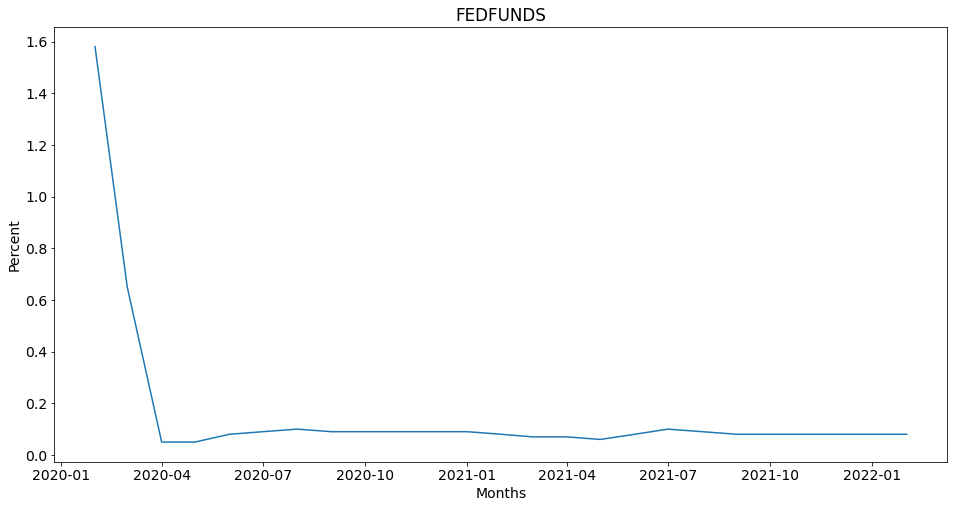

In [199]:
plt.plot(new_df['FEDFUNDS'])
plt.xlabel("Months")
plt.ylabel("Percent")
plt.title("FEDFUNDS")

Text(0.5, 1.0, 'COVID confirmed cases')

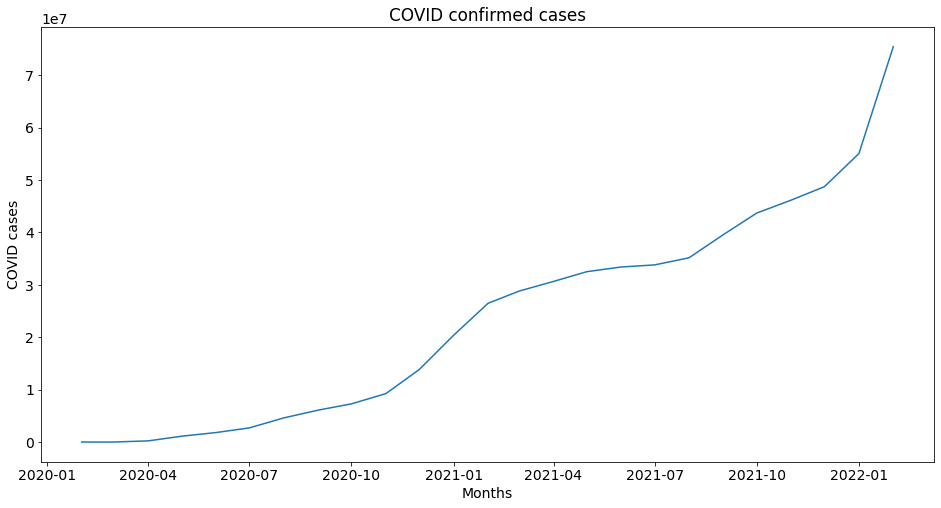

In [200]:
plt.plot(new_df['Confirmed'])
plt.xlabel("Months")
plt.ylabel("COVID cases")
plt.title("COVID confirmed cases")

Text(0.5, 1.0, 'Unemployment rate')

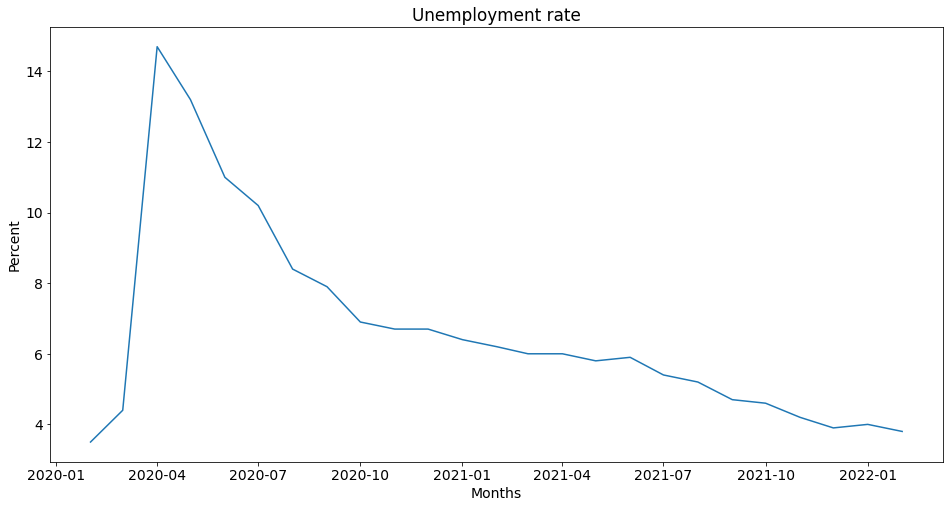

In [201]:
plt.plot(new_df['UNRATE'])
plt.xlabel("Months")
plt.ylabel("Percent")
plt.title("Unemployment rate")

Text(0.5, 1.0, ' Industrial Production: Total Index')

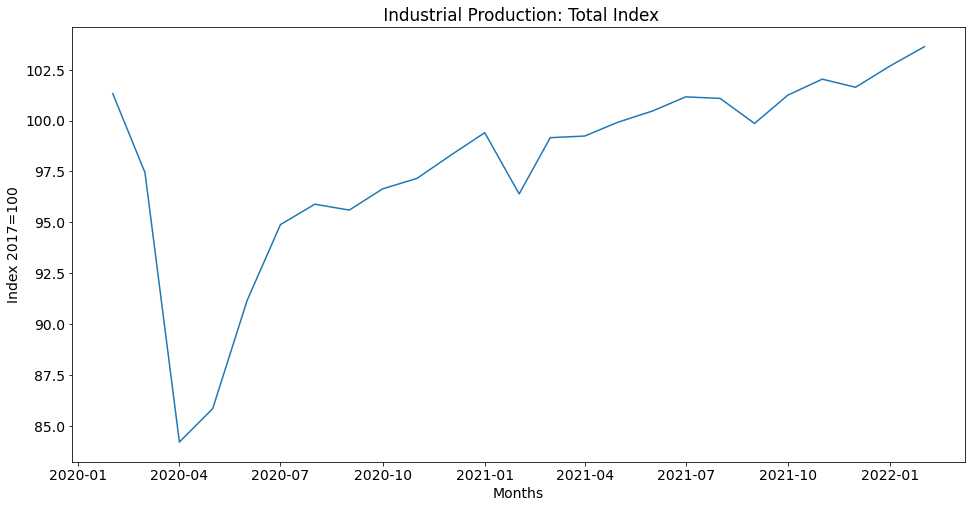

In [202]:
plt.plot(new_df['INDPRO'])
plt.xlabel("Months")
plt.ylabel("Index 2017=100")
plt.title(" Industrial Production: Total Index")

Text(0.5, 1.0, 'Government social benefits to persons')

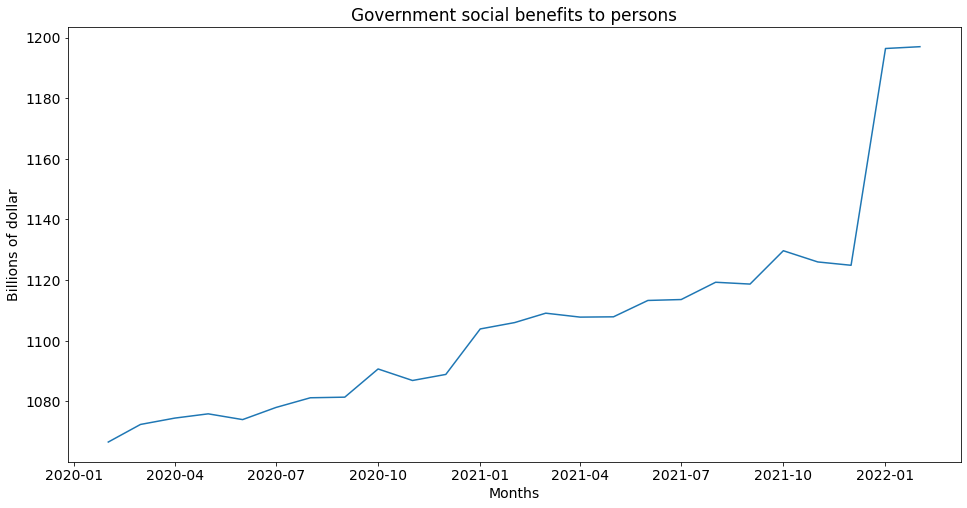

In [203]:
plt.plot(new_df['W823RC1'])
plt.xlabel("Months")
plt.ylabel("Billions of dollar")
plt.title("Government social benefits to persons")

Text(0.5, 1.0, 'Crude Oil Prices: Brent')

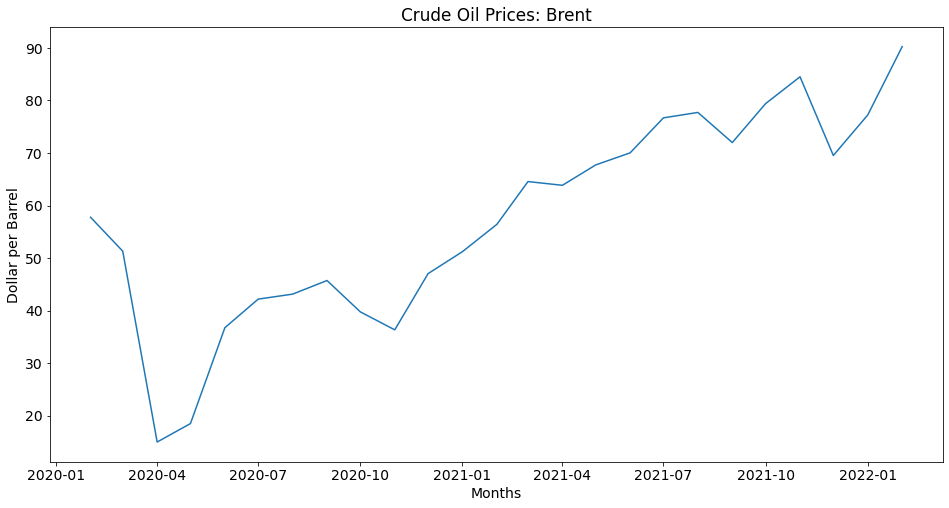

In [204]:
plt.plot(new_df['DCOILBRENTEU'])
plt.xlabel("Months")
plt.ylabel("Dollar per Barrel")
plt.title("Crude Oil Prices: Brent")

Text(0.5, 1.0, ' Cass Freight Index')

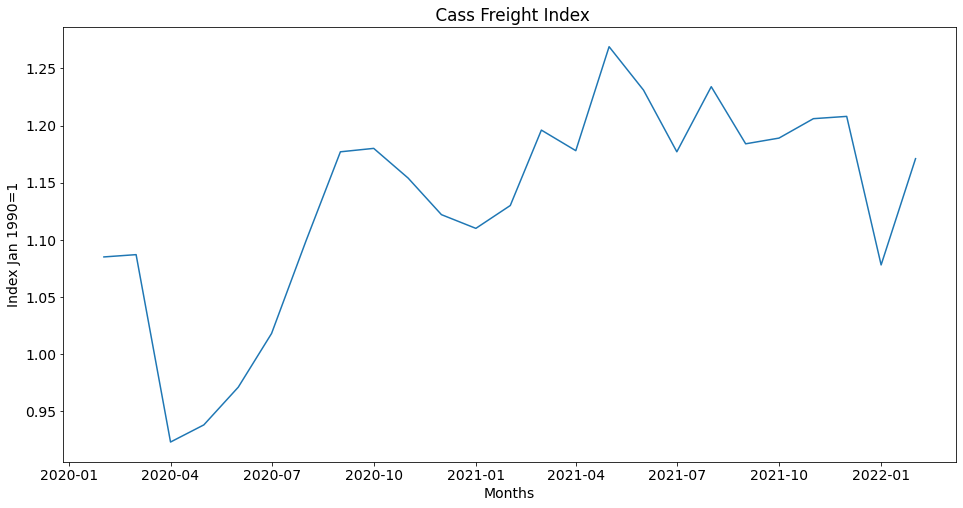

In [205]:
plt.plot(new_df['FRGSHPUSM649NCIS_x'])
plt.xlabel("Months")
plt.ylabel("Index Jan 1990=1")
plt.title(" Cass Freight Index")

Text(0.5, 1.0, 'M2-money supply')

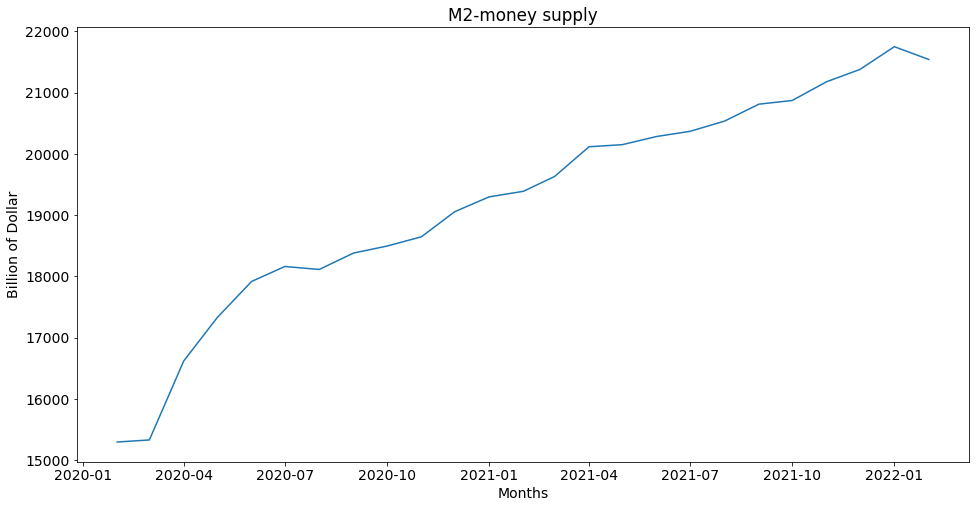

In [206]:
plt.plot(new_df['WM2NS'])
plt.xlabel("Months")
plt.ylabel("Billion of Dollar")
plt.title("M2-money supply")

Text(0.5, 1.0, ' Consumer Price Index for All Urban Consumers')

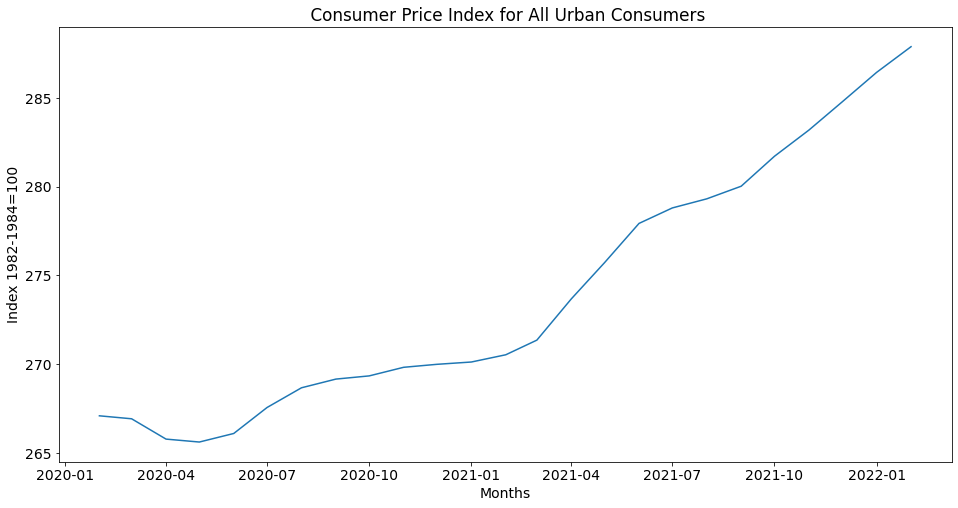

In [207]:
plt.plot(new_df['CPILFESL'])
plt.xlabel("Months")
plt.ylabel("Index 1982-1984=100")
plt.title(" Consumer Price Index for All Urban Consumers")

In [208]:
reg4 = 'CPILFESL~Confirmed+FEDFUNDS+UNRATE+INDPRO+W823RC1+DCOILBRENTEU+FRGSHPUSM649NCIS_x+WM2NS'
reg4output=smf.ols(reg4, new_df).fit()
print(reg4output.summary())

                            OLS Regression Results                            
Dep. Variable:               CPILFESL   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     31.00
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.54e-08
Time:                        01:17:14   Log-Likelihood:                -48.762
No. Observations:                  25   AIC:                             115.5
Df Residuals:                      16   BIC:                             126.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            236.6461     64

In [209]:
reg4output.tvalues

Intercept             3.651940
Confirmed             1.011626
FEDFUNDS              1.017418
UNRATE               -0.537120
INDPRO               -0.724856
W823RC1               0.640577
DCOILBRENTEU          0.783219
FRGSHPUSM649NCIS_x   -0.141208
WM2NS                 1.544606
dtype: float64

In [210]:
new_df.drop(columns='FRGSHPUSM649NCIS_y', inplace=True)
new_df.describe()

,Confirmed,FEDFUNDS,UNRATE,INDPRO,W823RC1,CPILFESL,FRGSHPUSM649NCIS_x,DCOILBRENTEU,WM2NS
count,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2.386194e+07,0.163200,6.628000,97.857096,1105.764000,273.893240,1.132600,57.382000,19225.164000
std,2.070722e+07,0.316606,2.898781,4.797631,33.379046,7.054161,0.091242,19.840358,1804.581327
min,8.000000e+00,0.050000,3.500000,84.201800,1066.600000,265.606000,0.923000,14.970000,15294.000000
25%,4.601269e+06,0.080000,4.600000,96.396600,1081.200000,268.662000,1.087000,43.130000,18160.500000
50%,2.646347e+07,0.080000,6.000000,99.241600,1106.000000,270.522000,1.171000,57.770000,19389.200000
75%,3.514526e+07,0.090000,6.900000,101.167600,1118.700000,279.306000,1.189000,71.990000,20534.700000
max,7.542360e+07,1.580000,14.700000,103.634100,1197.000000,287.878000,1.269000,90.240000,21750.100000


Text(0, 0.5, 'hello')

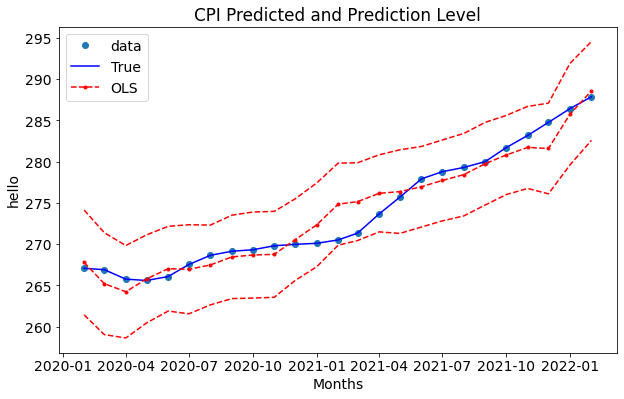

In [223]:
pred_ols = reg4output.get_prediction()

x=new_df.index
y_true=new_df['CPILFESL']

iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, reg4output.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")
ax.title.set_text("CPI Predicted and Prediction Level")
ax.set_xlabel('Months')
ax.set_ylabel('hello')

Text(0, 0.5, 'hello')

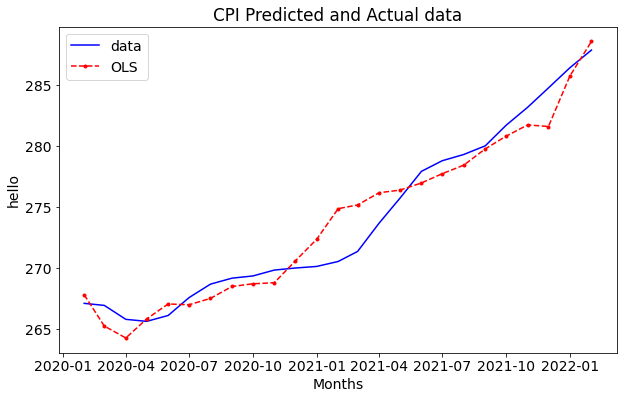

In [222]:
pred_ols = reg4output.get_prediction()

x=new_df.index
y_true=new_df['CPILFESL']
iv= pred_ols.summary_frame()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y_true, "b-", label="data")
ax.plot(x, reg4output.fittedvalues, "r--.", label="OLS")
ax.legend(loc="best")
ax.title.set_text("CPI Predicted and Actual data")
ax.set_xlabel('Months')
ax.set_ylabel('hello')

Text(0, 0.5, 'hello')

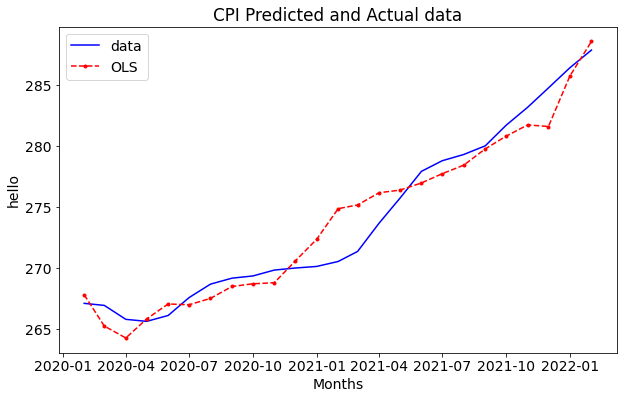

In [222]:
pred_ols = reg4output.get_prediction()

x=new_df.index
y_true=new_df['CPILFESL']
iv= pred_ols.summary_frame()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y_true, "b-", label="data")
ax.plot(x, reg4output.fittedvalues, "r--.", label="OLS")
ax.legend(loc="best")
ax.title.set_text("CPI Predicted and Actual data")
ax.set_xlabel('Months')
ax.set_ylabel('hello')

In [213]:
print(iv)

                  mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
DATE                                                                           
2020-02-01  267.787898  2.110142     263.314597     272.261199    261.436519   
2020-03-01  265.221368  1.989920     261.002925     269.439811    259.046836   
2020-04-01  264.241481  1.568113     260.917230     267.565732    258.639675   
2020-05-01  265.803191  1.346620     262.948484     268.657898    260.466624   
2020-06-01  267.035619  1.157793     264.581208     269.490031    261.902031   
2020-07-01  266.965862  1.398186     264.001840     269.929884    261.570029   
2020-08-01  267.491165  0.822080     265.748434     269.233896    262.657253   
2020-09-01  268.468581  1.078652     266.181941     270.755221    263.413058   
2020-10-01  268.689275  1.234439     266.072381     271.306168    263.476049   
2020-11-01  268.777551  1.228810     266.172589     271.382512    263.570304   
2020-12-01  270.553757  0.958066     268

In [214]:
reg4output.params

Intercept             2.366461e+02
Confirmed             1.324402e-07
FEDFUNDS              3.730200e+00
UNRATE               -3.646309e-01
INDPRO               -3.697663e-01
W823RC1               3.271267e-02
DCOILBRENTEU          6.953895e-02
FRGSHPUSM649NCIS_x   -1.673667e+00
WM2NS                 1.758732e-03
dtype: float64

In [215]:
Y = new_df['CPILFESL']
X = new_df[['Confirmed',
 'FEDFUNDS',
 'W823RC1',
 'UNRATE',
 'INDPRO',
 'DCOILBRENTEU',
 'FRGSHPUSM649NCIS_x',
 'WM2NS',
]]
X = sm.add_constant(X)

In [216]:
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CPILFESL   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     31.00
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.54e-08
Time:                        01:17:15   Log-Likelihood:                -48.762
No. Observations:                  25   AIC:                             115.5
Df Residuals:                      16   BIC:                             126.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                236.6461     64.800      3.652      0.002      99.276     374.016
Confirmed           1.324e-07   1.31e-07      1.012      0.327   -1.45e-07     4.1e-07
FEDFUNDS               3.7302      3.666      1.017      0.324      -4.042      11.502
W823RC1                0.0327      0.051      0.641      0.531      -0.076       0.141
UNRATE                -0.3646      0.679     -0.537      0.599      -1.804       1.074
INDPRO                -0.3698      0.510     -0.725      0.479      -1.451       0.712
DCOILBRENTEU           0.0695      0.089      0.783      0.445      -0.119       0.258
FRGSHPUSM649NCIS_x    -1.6737     11.852     -0.141      0.889     -26.800      23.452
WM2NS                  0.0018      0.001      1.545      0.142      -0.001       0.004
==============================================================================
Omnibus:                        5.860   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                4.029
Skew:                          -0.935   Prob(JB):                        0.133
Kurtosis:                       3.607   Cond. No.                     4.80e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

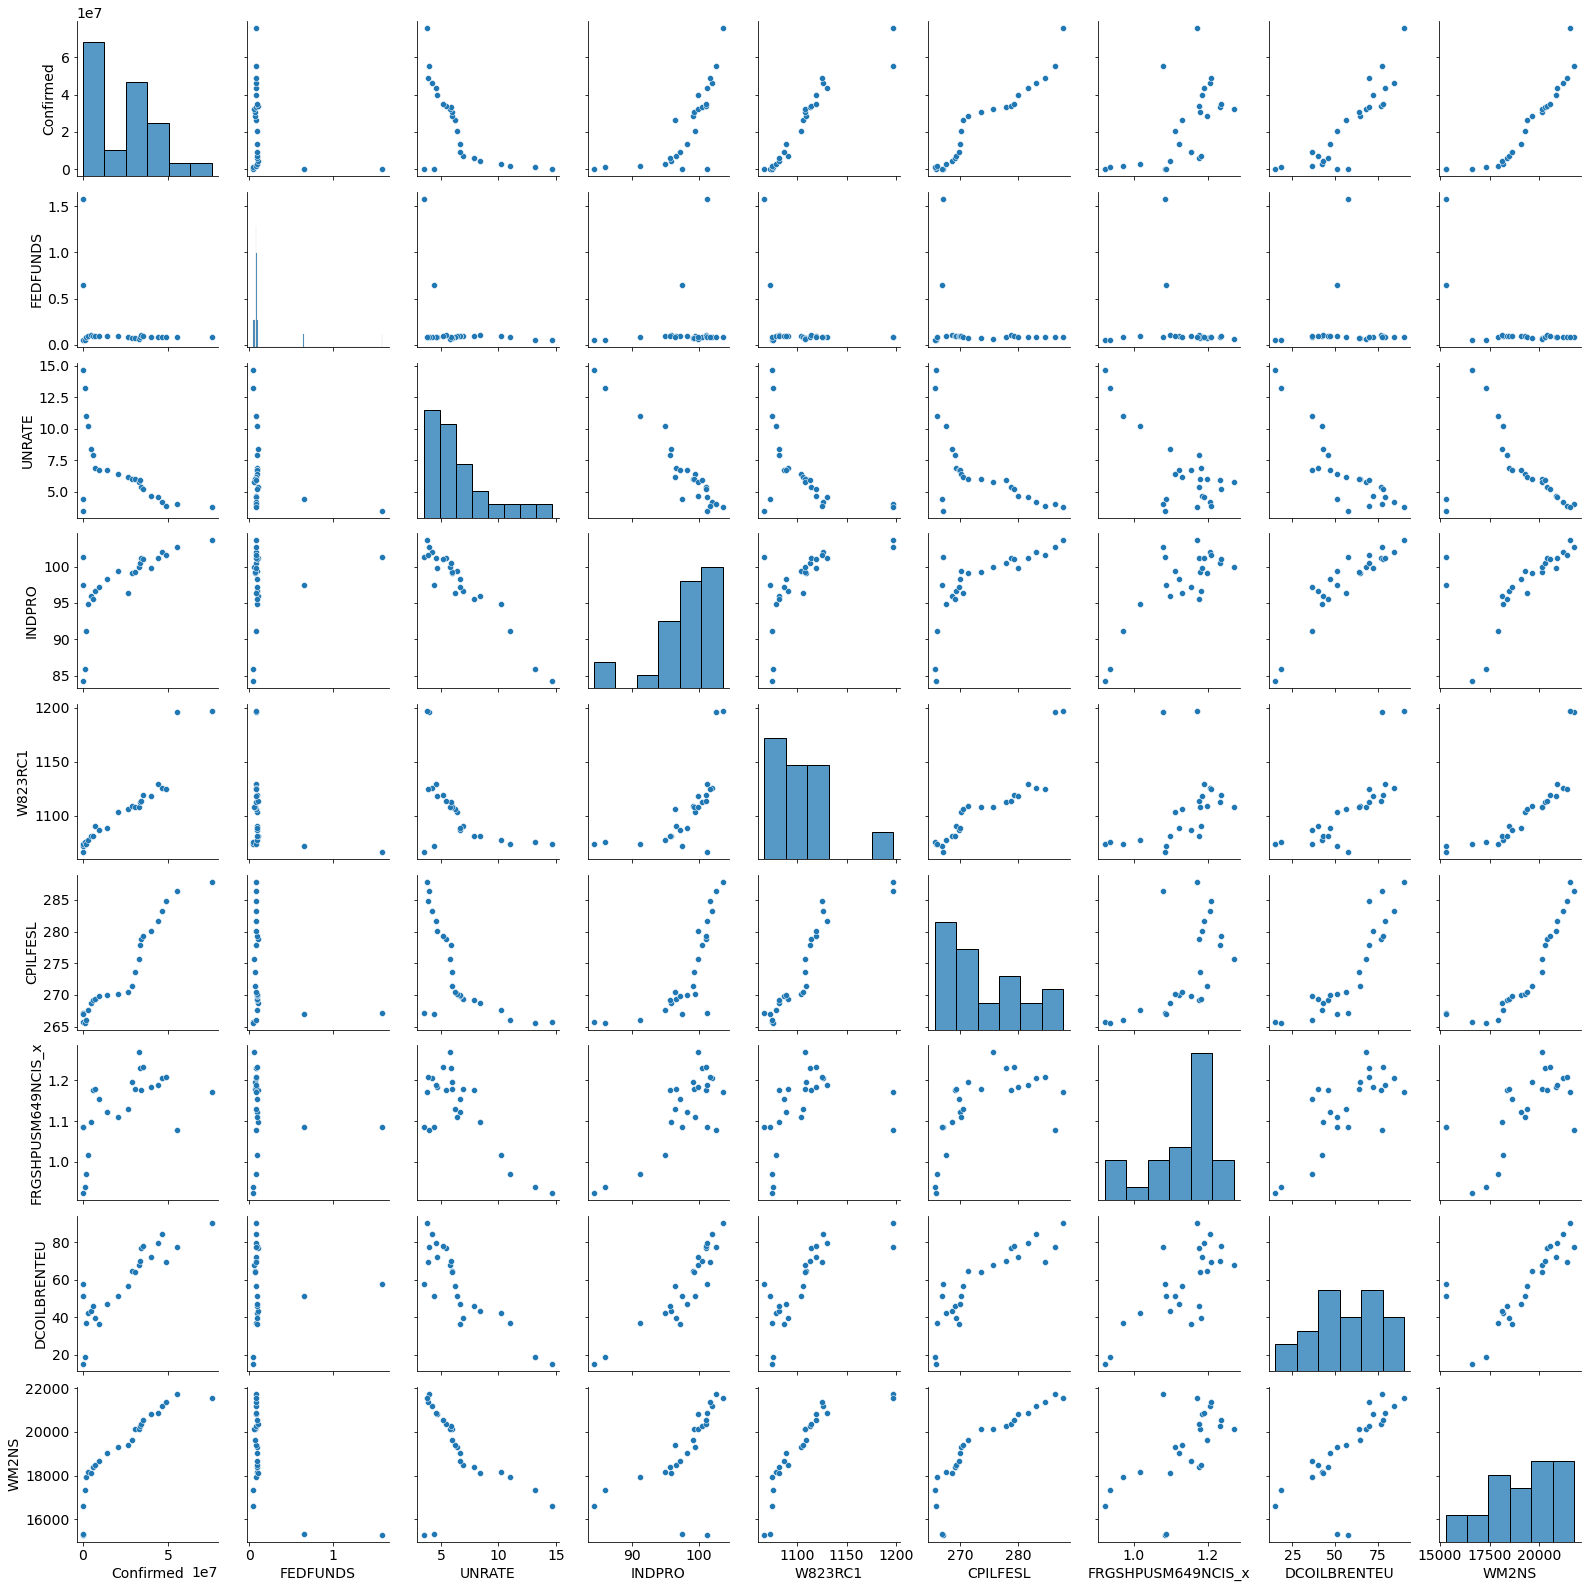

In [217]:
sns.pairplot(new_df);

C:\Users\Chan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


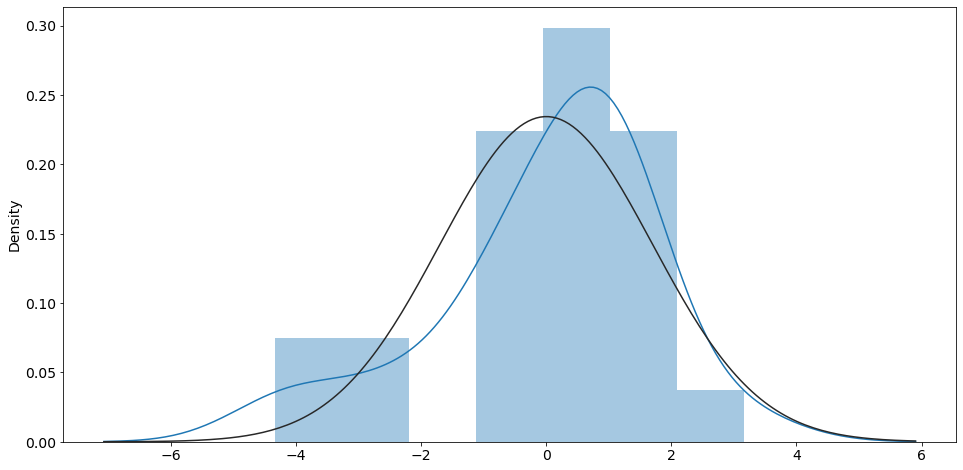

In [218]:
sns.distplot(reg4output.resid, fit=stats.norm);

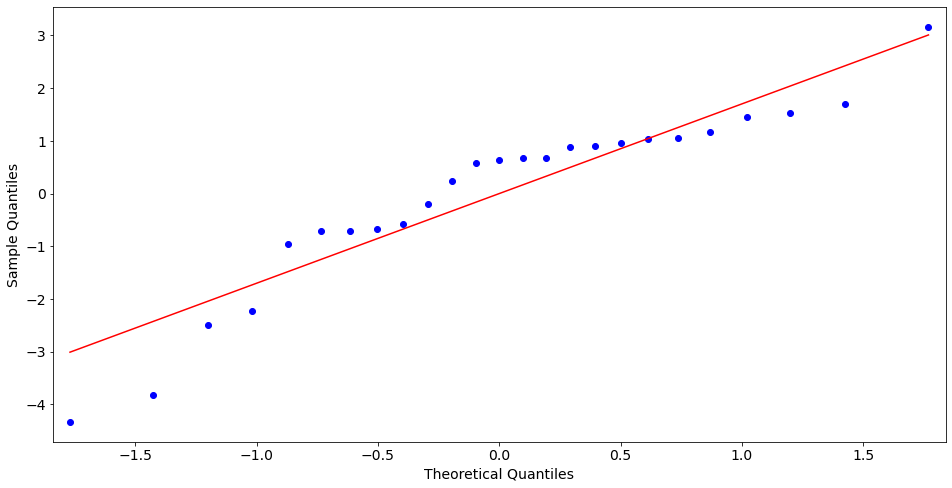

In [219]:
sm.qqplot(reg4output.resid, line='s');

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

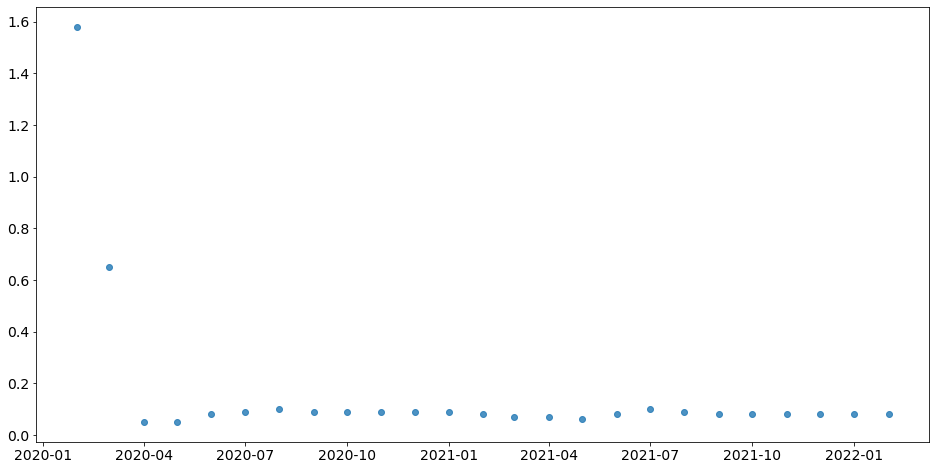

In [220]:
sns.regplot(data = new_df, x = new_df.index, y = new_df['FEDFUNDS'])